### Análise Exploratória de Dados
### Para  este projeto o objetivo é responder 10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando base dados
vendas = pd.read_csv('dataset.csv')

In [3]:
vendas.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [4]:
vendas.shape

(9700, 11)

In [5]:
vendas.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [6]:
vendas.duplicated().sum()

0

In [7]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [8]:
vendas['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

**1 - Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?**

In [9]:
# Filtrando a categoria 'Office Supplies'
categoria_office = vendas[vendas['Categoria'] == 'Office Supplies']

# Agrupando os dados por 'Cidade' e somando os valores da coluna 'Valor_venda'
venda_cidade = categoria_office.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False)
venda_cidade

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

A cidade com maior valor de venda é Nova York com 68362.814

In [10]:
#Poderiamos usar também o método idxmax() para encontrar o índice da cidade com o maior valor de vendas 
maior_valor=venda_cidade.idxmax()
maior_valor

'New York City'

**2 - Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.**

In [11]:
pedido_agrupado = vendas.groupby('Data_Pedido')['Valor_Venda'].sum()
pedido_agrupado

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
                ...    
31/10/2017    2346.5790
31/10/2018     523.9280
31/12/2015    5253.2700
31/12/2016    1381.3440
31/12/2017     731.7680
Name: Valor_Venda, Length: 1226, dtype: float64

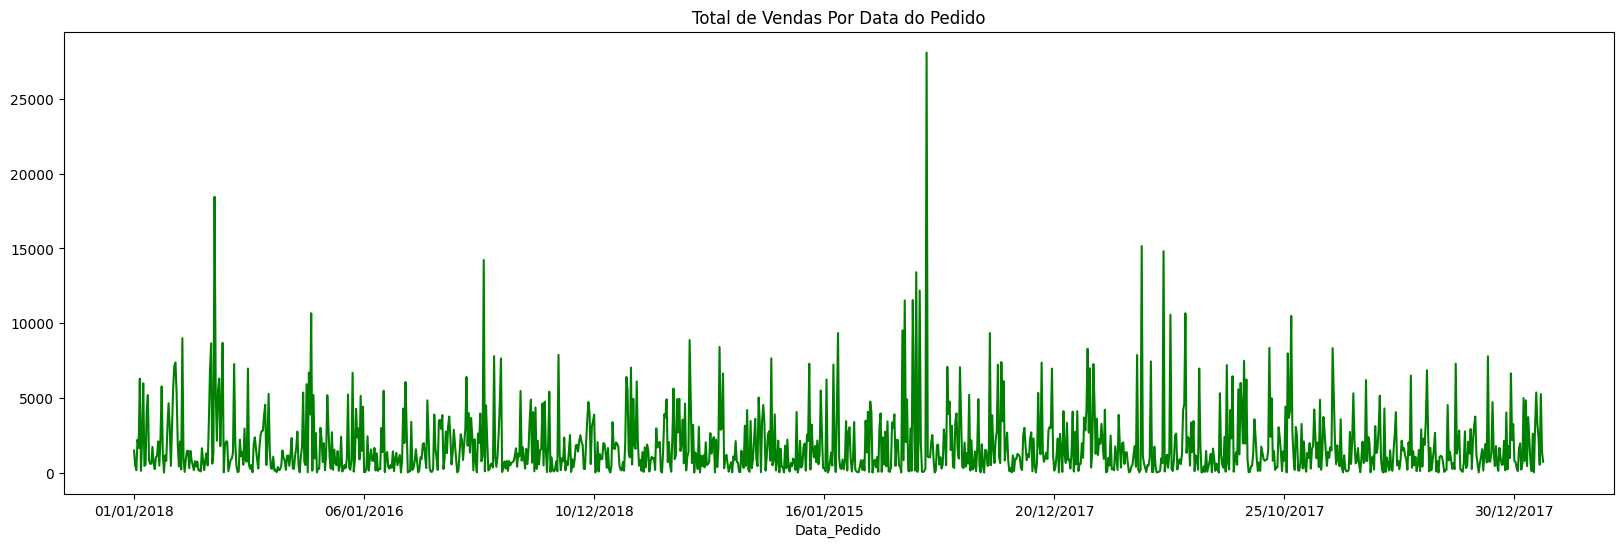

In [12]:
# Plotando o gráfico, tamanho, eixos, título
plt.figure(figsize = (20, 6))
pedido_agrupado.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

In [13]:
#Como ficou um gráfico não muito visual, resolvi separar por ano do pedido para posteriormente agrupar novamente.
vendas['Ano_Pedido']= vendas['Data_Pedido'].str.split('/').str[2]
vendas.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [14]:
# Agrupando os valores por Ano e usando sort_index() para ordenar os resultados com base no índice ('Ano_Pedido').
pedido_agrupado1 = vendas.groupby('Ano_Pedido')['Valor_Venda'].sum().sort_index(ascending=True)
pedido_agrupado1

Ano_Pedido
2015    470768.6001
2016    454072.5154
2017    595365.9240
2018    715350.9152
Name: Valor_Venda, dtype: float64

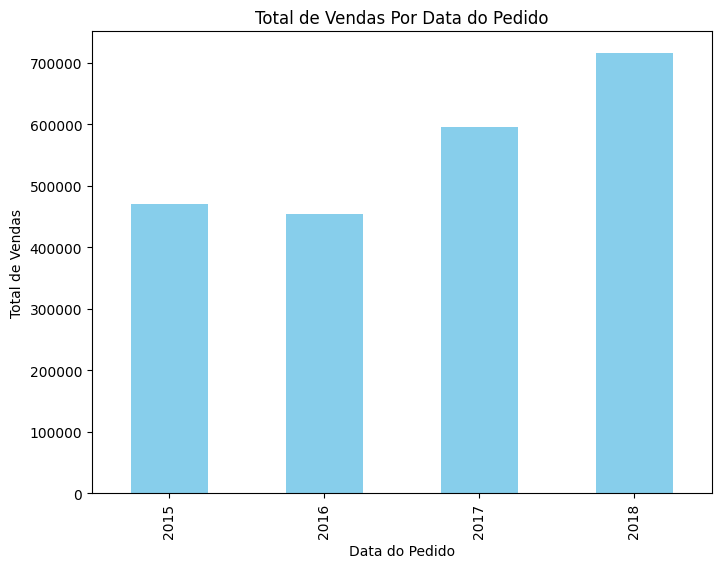

In [15]:
#Tamanho
plt.figure(figsize=(8, 6))
# Criando o gráfico de barras, como atribuimos o sort_values para ordenar os valores,o gráfico também estará ordenado.
pedido_agrupado1.plot(kind='bar', color='skyblue')
# Adicionando rótulos e título, opcional:
plt.title('Total de Vendas Por Data do Pedido')
plt.xlabel('Data do Pedido')
plt.ylabel('Total de Vendas')
plt.show()

**3 - Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.**

In [16]:
estado_vendas= vendas.groupby('Estado')['Valor_Venda'].sum().sort_values(ascending=False)
estado_vendas.head()

Estado
California      442927.0975
New York        304536.4010
Texas           163549.8602
Washington      133826.0060
Pennsylvania    114411.6800
Name: Valor_Venda, dtype: float64

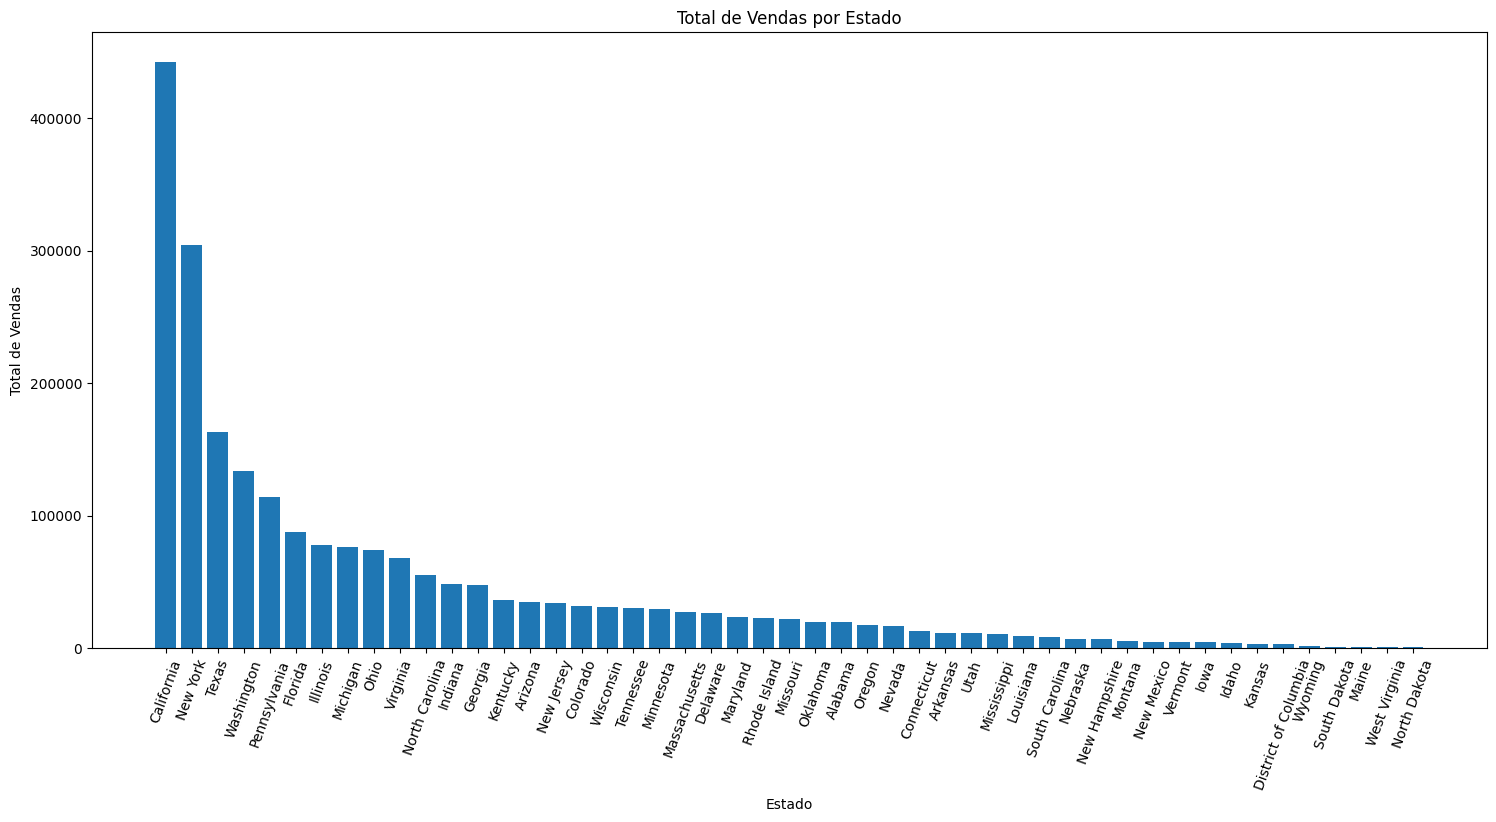

In [17]:
#Neste código, usamos estado_vendas.index para acessar os índices da série (que são os estados) e 
#estado_vendas para acessar os valores (que são os totais de vendas)
plt.figure(figsize=(18, 8))
plt.bar(estado_vendas.index, estado_vendas)  
plt.xlabel('Estado')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Estado')
plt.xticks(rotation=70)
plt.show()

**4 - Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.**

In [18]:
cidade_vendas= vendas.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).head(10)
cidade_vendas

Cidade
New York City    251749.2190
Los Angeles      171654.6330
Seattle          114725.4780
San Francisco    107489.9520
Philadelphia     107197.8030
Houston           61590.1868
San Diego         47458.3790
Chicago           46974.3430
Jacksonville      44713.1830
Detroit           42446.9440
Name: Valor_Venda, dtype: float64

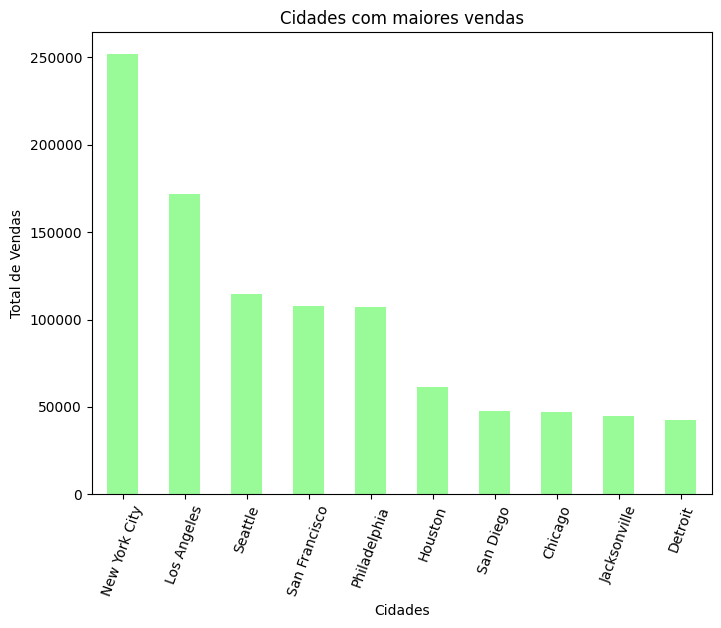

In [19]:
plt.figure(figsize=(8, 6))
cidade_vendas.plot(kind='bar', color='palegreen')
plt.title('Cidades com maiores vendas')
plt.xlabel('Cidades')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=70)
plt.show()

**5 - Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.**

In [20]:
#Configurando a formatação para exibir valores em formato decimal completo, estava em notação cientifica
pd.options.display.float_format = '{:.2f}'.format

#Agrupando os valores de vendas por 'Segmento', calculando a soma e ordenando os valores.
Segmento_vendas= vendas.groupby('Segmento')['Valor_Venda'].sum().sort_values(ascending=False)
Segmento_vendas

Segmento
Consumer      1133834.33
Corporate      679232.19
Home Office    422491.43
Name: Valor_Venda, dtype: float64

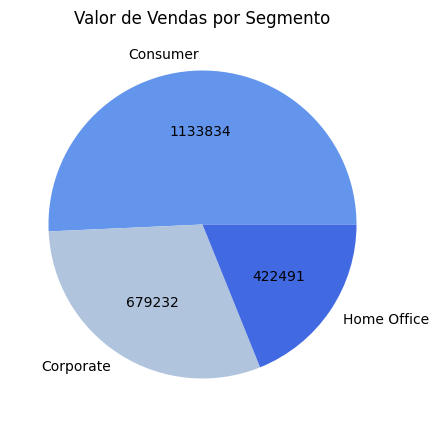

In [21]:
# gráfico de pizza com valores absolutos
plt.figure(figsize=(5, 5))
plt.pie(Segmento_vendas, labels=Segmento_vendas.index, colors=['cornflowerblue', 'lightsteelblue', 'royalblue'],\
        autopct=lambda p: f'{p * sum(Segmento_vendas) / 100:.0f}')
plt.title('Valor de Vendas por Segmento')
plt.show()

O segmento com maior vendas foi Consumer com R$1.133.834,33

**Segmento_vendas** é a série de valores que você deseja representar no gráfico.  
**labels=Segmento_vendas.index** define os rótulos para cada fatia do gráfico de pizza.   
**autopct** é um argumento que permite definir como as porcentagens são exibidas nas fatias do gráfico de pizza. Neste caso em específico, estamos usando uma função lambda para calcular os valores absolutos correspondentes a cada porcentagem.  
**lambda p: f'{p * sum(Segmento_vendas) / 100:.0f}'** é a função lambda que faz o cálculo. Aqui está o que ela faz:  
**p** é o valor da porcentagem para uma fatia específica do gráfico.  
**sum(Segmento_vendas)** calcula a soma de todos os valores em Segmento_vendas, que é o valor total de vendas.  
**p * sum(Segmento_vendas) / 100** calcula o valor absoluto correspondente à porcentagem.  
**f'{...:.0f}'** formata esse valor absoluto para que ele seja exibido sem casas decimais (como um número inteiro).

**6 - Qual o Total de Vendas Por Segmento e Por Ano?**

In [22]:
vendas.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016


In [23]:
Ano_segmento = vendas.groupby(['Ano_Pedido', 'Segmento'])['Valor_Venda'].sum().unstack()
Ano_segmento

Segmento,Consumer,Corporate,Home Office
Ano_Pedido,,,
2015,256719.92,125819.60,88229.09
2016,265295.26,114643.12,74134.13
2017,288459.56,203266.74,103639.63
2018,323359.60,235502.73,156488.58


O **método unstack()** é uma função que permite reorganizar dados em um DataFrame. Ele é usado para "desempilhar" níveis de índice em um DataFrame com índices hierárquicos, convertendo-os em colunas

**7 - Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:  
Se o Valor_Venda for maior que 1000 recebe 15% de desconto.  
Se o Valor_Venda for menor que 1000 recebe 10% de desconto.  
Quantas Vendas Receberiam 15% de Desconto?**  

In [24]:
Venda_mil= (vendas['Valor_Venda'] >= 1000).sum()
Venda_mil

457

In [25]:
Venda_m= (vendas['Valor_Venda'] < 1000).sum()
Venda_m

9243

457 vendas receberiam desconto de 15%

O Código acima é uma **expressão booleana** que cria uma nova série booleana. Cada elemento desta série será True se o valor de venda correspondente na coluna 'Valor_Venda' for maior ou igual a 1000, caso contrário, será False. Em seguida, usamos a função .sum() para contar quantos valores True estão na série booleana.  
Poderimos usar tanto o método **query quanto o método loc** para realizar a filtragem, eles retornariam um novo DataFrame resultado da filtragem aplicada à condição e ao invés do sum() usaríamos o shape para obter o número de linhas desse DataFrame resultante. 

**8 - Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?**

In [26]:
#Agora, estamos selecionando a coluna 'Valor_Venda' do DataFrame resultante após a filtragem e em seguidas aplicamos a 
#função mean
Venda_media = vendas[vendas['Valor_Venda'] >= 1000]['Valor_Venda'].mean()
Venda_media

2116.8078153172864

Média do valor antes 2116.81R$

Calculo: Quando você aplica um desconto a um valor, você está calculando o novo valor após a redução. Para aplicar um desconto de 15%, você está efetivamente calculando 85% do valor original, pois 100% - 15% = 85%. Portanto, você multiplica o valor original por 0,85 para obter o valor após o desconto.

In [27]:
#Aplicando o desconto de 15%
Venda_desconto = vendas[vendas['Valor_Venda'] >= 1000]['Valor_Venda'] * 0.85
Venda_desconto.mean()

1799.2866430196934

Média do valor depois 1799,27R$

**9 - Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.**

In [28]:
vendas.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016


In [29]:
vendas['Mes_Pedido']= vendas['Data_Pedido'].str.split('/').str[1]
vendas.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido,Mes_Pedido
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,06
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,10


In [30]:
media_geral = vendas[['Ano_Pedido', 'Mes_Pedido','Segmento', 'Valor_Venda']].\
groupby(['Ano_Pedido', 'Mes_Pedido','Segmento']).mean()
media_geral

Valor_Venda
Ano_Pedido Mes_Pedido Segmento                
2015       01         Consumer          146.74
                      Corporate         130.89
                      Home Office       329.86
           02         Consumer          117.33
                      Corporate          69.24
...                                        ...
2018       11         Corporate         341.22
                      Home Office       247.52
           12         Consumer          183.62
                      Corporate         153.17
                      Home Office       224.52

[144 rows x 1 columns]

Na instrução acima, primeiro filtramos os dados, extraindo quatros colunas: 'Segmento', 'Ano_Pedido', 'Mes_Pedido', 'Valor_Venda. Em seguida, agrupamos os dados por três colunas: 'Segmento', 'Ano_Pedido', 'Mes_Pedido'. E, finalmente, calculamos a média para a coluna que não estava incluída no agrupamento, neste caso, a coluna 'Valor_Venda'.

In [31]:
#Criando uma variável chamada anos e extraindo os valores do primeiro nível do índice (índice 0) do DataFrame
anos = media_geral.index.get_level_values(0)

#Extraindo os valores do segundo nível do índice (índice 1) 
meses = media_geral.index.get_level_values(1)

#Extraindo os valores do terceiro nível do índice (índice 2)
segmentos = media_geral.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

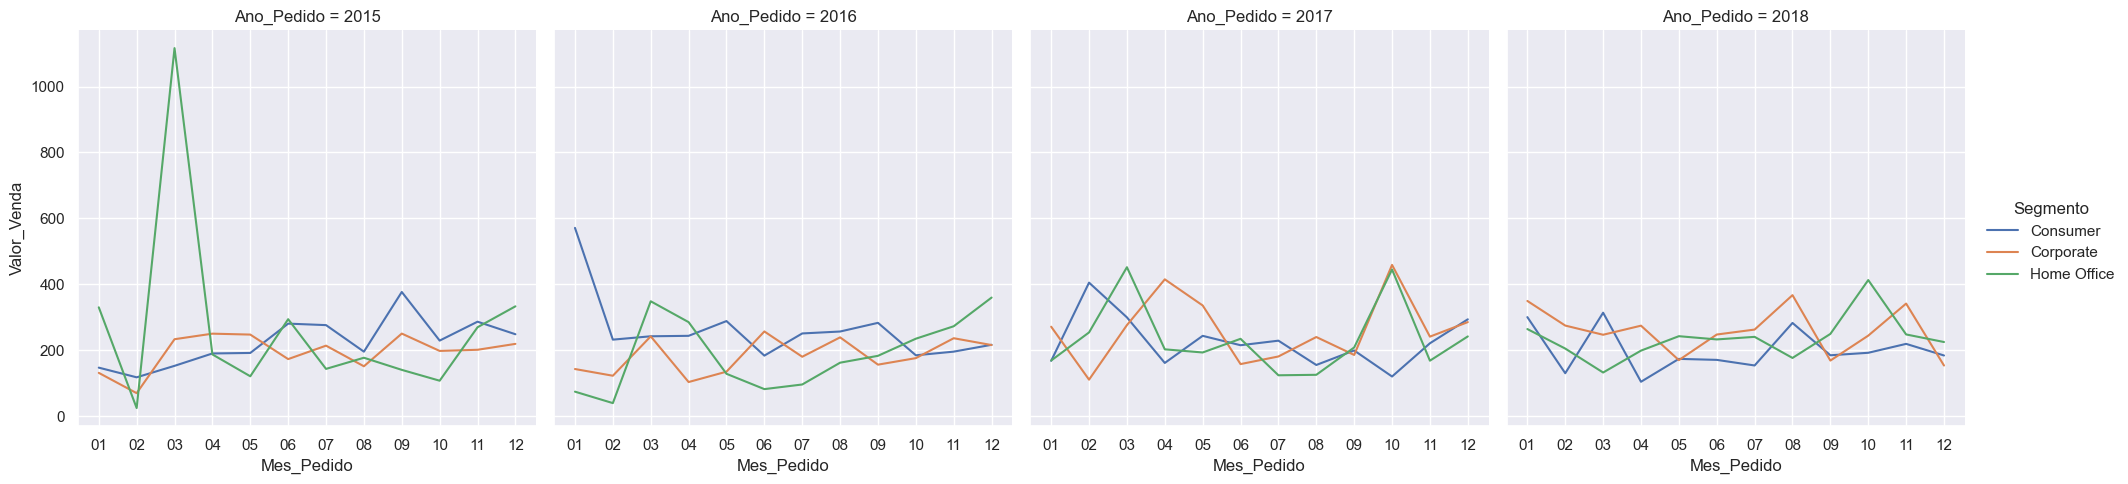

In [32]:
# Plotando os gráfico, eu poderia ter optado por não extrair os valores e colocá-los diretamente em cada parâmetro do gráfico 
#como no eixo y= 'Valor_Venda'

#Define o tamanho da figura
plt.figure(figsize = (12, 6))
#Configura as configurações padrão de estilo do Seaborn
sns.set()
# Esta linha cria um gráfico de linhas usando a função relplot
fig1 = sns.relplot(kind = 'line',
        data = media_geral, #Especifica o DataFrame de onde os dados serão retirados.
        y = 'Valor_Venda',  #Indica qual coluna do DataFrame será usada para os valores no eixo y.
        x = meses,          #Indica qual coluna do DataFrame será usada para os valores no eixo x.
        hue = segmentos,    #Indica que as linhas do gráfico serão coloridas de acordo com os diferentes valores desta coluna. 
        col = anos,         #Indica a coluna que será usada para criar subplots separados para cada ano.
        col_wrap = 4),      #Especifica que os subplots devem ser organizados em 4 colunas.

plt.show()

**10 - Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico.**

In [33]:
vendas.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido,Mes_Pedido
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,06
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,10


In [34]:
#Agrupando dados, calculando a soma dos valores, ordenando por Volor venda e colocando indice 
vendas_total = vendas[['Categoria', 'SubCategoria', 'Valor_Venda']].\
groupby(['Categoria', 'SubCategoria']).sum().sort_values(by='Valor_Venda', ascending=False).reset_index().head(12)
vendas_total

,Categoria,SubCategoria,Valor_Venda
0,Technology,Phones,325271.29
1,Furniture,Chairs,317919.62
2,Office Supplies,Storage,216188.36
3,Furniture,Tables,202083.36
4,Office Supplies,Binders,194723.38
5,Technology,Machines,189238.63
6,Technology,Accessories,162791.36
7,Technology,Copiers,146248.09
8,Furniture,Bookcases,108045.05
9,Office Supplies,Appliances,104061.69


In [35]:
#Ordenando por categoria
vendas_total1 = vendas_total.sort_values(by='Categoria', ascending=False)

#Criando a coluna 'Indice', agrupando pelo Categoria para que o método cumcount seja aplicado a cada elemento
#dentro do mesmo grupo. Desta forma,o cumcount atribuí índices cumulativos dentro de cada grupo.
vendas_total1['Indice_Categoria'] = vendas_total1.groupby('Categoria').cumcount() + 1
vendas_total1

,Categoria,SubCategoria,Valor_Venda,Indice_Categoria
0,Technology,Phones,325271.29,1
5,Technology,Machines,189238.63,2
6,Technology,Accessories,162791.36,3
7,Technology,Copiers,146248.09,4
2,Office Supplies,Storage,216188.36,1
4,Office Supplies,Binders,194723.38,2
9,Office Supplies,Appliances,104061.69,3
11,Office Supplies,Paper,76312.76,4
1,Furniture,Chairs,317919.62,1
3,Furniture,Tables,202083.36,2


In [36]:
#Criando uma nova coluna 'Soma Categoria', agrupando por 'Categoria' e somando a coluna 'Valor_Venda' em cada grupo.
#Usa-se 0  transform para agregar informações ao nível do grupo e adicioná-las a cada linha correspondente no DF.
vendas_total1['Soma_Categoria'] = vendas_total1.groupby('Categoria')['Valor_Venda'].transform('sum')

#Para que o valor da soma por categoria não seja repetido em todas as linhas, vamos criar um código para que o resultado só
#apareça uma única vez por categoria.

# Selecionado a coluna que será modificada
coluna_selecionada = 'Soma_Categoria'

# Usando função query para selecionar as linhas desejadas
linhas_selecionadas = vendas_total1.query('Indice_Categoria in [2,3,4]').index

# Acessando as linhas e colunas especificadas pelo método loc, e atribuindo ' ' a essas células
vendas_total1.loc[linhas_selecionadas, coluna_selecionada] = ' '
vendas_total1

,Categoria,SubCategoria,Valor_Venda,Indice_Categoria,Soma_Categoria
0,Technology,Phones,325271.29,1,823549.38
5,Technology,Machines,189238.63,2,
6,Technology,Accessories,162791.36,3,
7,Technology,Copiers,146248.09,4,
2,Office Supplies,Storage,216188.36,1,591286.20
4,Office Supplies,Binders,194723.38,2,
9,Office Supplies,Appliances,104061.69,3,
11,Office Supplies,Paper,76312.76,4,
1,Furniture,Chairs,317919.62,1,716910.80
3,Furniture,Tables,202083.36,2,


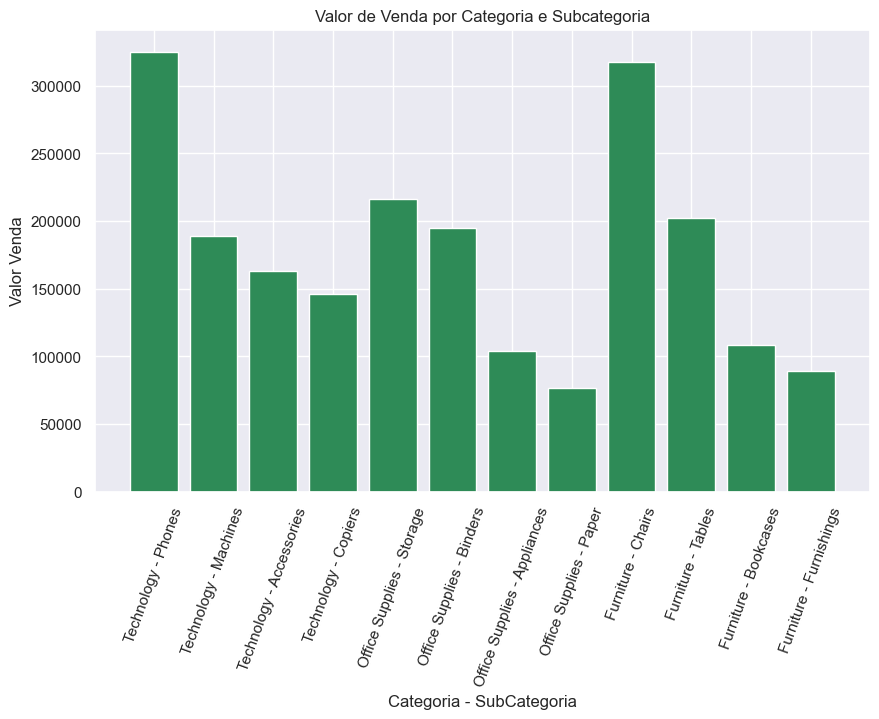

In [37]:
# Criando rótulos compostos para as barras do gráfico
#Os rótulos são formados pela concatenação das colunas 'Categoria' e 'SubCategoria 
rotulos = vendas_total1['Categoria'] + ' - ' + vendas_total1['SubCategoria']

#Tamanho da figura
plt.figure(figsize=(10, 6))
# Esta linha cria o gráfico de barras. Os rótulos compostos estão no eixo x 
# Os valores de venda estão no eixo y. Definimos também a cor das barras
plt.bar(rotulos, vendas_total1['Valor_Venda'], color='seagreen')

# Adicionando rótulos aos eixos
plt.xlabel('Categoria - SubCategoria')
plt.ylabel('Valor Venda')

# Rotacionamos os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=70)

# Adicionando título ao gráfico
plt.title('Valor de Venda por Categoria e Subcategoria')

# Mostrando o gráfico
plt.show()

### Gráfico com cores correspondentes para cada categoria

**Para criar um gráfico em que cada categoria possua uma unica cor, precisamos criar uma nova coluna que associe uma cor específica a cada categoria.**  
A explicação do código usado para criar a **Coluna['Cor']** está abaixo:  
**O dicionário** é utilizado para que cada elemento unico(**'['Categoria'].unique()'**) da coluna 'categoria' seja atribuido para uma cor. Isso é feito usando a **função zip**, que combina elementos de duas sequências: (Categoria e **cores**) em pares. As categorias são usadas como chaves e as cores correspondentes como valores no dicionário.   
**A função map**, então, aplica esse dicionário a cada elemento da coluna 'Categoria' **(vendas_total1['Categoria'].map)** de modo que cada elemento no dicionário corresponda a sua própria categoria.

In [38]:
# Definindo uma lista de cores para cada categoria
cores = ['lightsteelblue', 'royalblue', 'navy']  

# Criamos uma coluna 'Cor' para realizar o mapeamento das cores conforme explicado anteriormente
vendas_total1['Cor'] = vendas_total1['Categoria'].map(dict(zip(vendas_total1['Categoria'].unique(), cores)))

In [39]:
#Visualizando a coluna cores. 
vendas_total1

,Categoria,SubCategoria,Valor_Venda,Indice_Categoria,Soma_Categoria,Cor
0,Technology,Phones,325271.29,1,823549.38,lightsteelblue
5,Technology,Machines,189238.63,2,,lightsteelblue
6,Technology,Accessories,162791.36,3,,lightsteelblue
7,Technology,Copiers,146248.09,4,,lightsteelblue
2,Office Supplies,Storage,216188.36,1,591286.20,royalblue
4,Office Supplies,Binders,194723.38,2,,royalblue
9,Office Supplies,Appliances,104061.69,3,,royalblue
11,Office Supplies,Paper,76312.76,4,,royalblue
1,Furniture,Chairs,317919.62,1,716910.80,navy
3,Furniture,Tables,202083.36,2,,navy


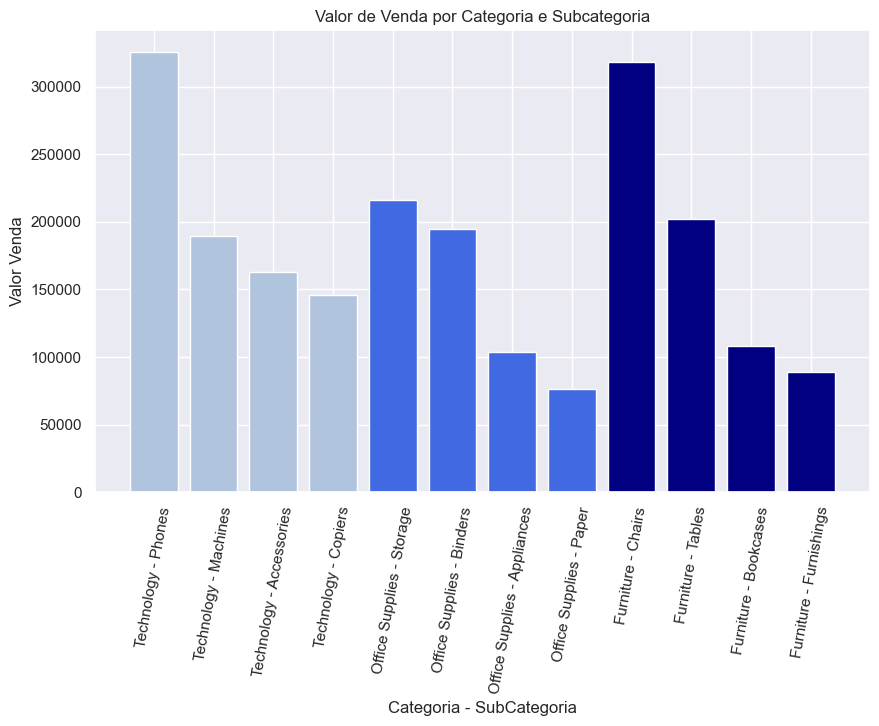

In [40]:
#M esmo código utilizado para plotar o outro gráfico anteriormente
rotulos = vendas_total1['Categoria'] + ' - ' + vendas_total1['SubCategoria']
plt.figure(figsize=(10, 6))
barras = plt.bar(rotulos, vendas_total1['Valor_Venda'], 
                 color=vendas_total1['Cor'])  #Atribuindo cores ao gráfico por meio da Coluna 'cor' criada anteriormente
plt.xlabel('Categoria - SubCategoria')
plt.ylabel('Valor Venda')
plt.xticks(rotation=80)
plt.title('Valor de Venda por Categoria e Subcategoria')
plt.show()